In [1]:
import pandas as pd
import pickle
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_model.csv")

print("Informasi Dataset:")
df.info()
df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   06:70:ab:a7:3f:93:  70 non-null     int64 
 1   06:0d:9e:a8:89:5c:  70 non-null     int64 
 2   06:70:ab:a7:3f:92:  70 non-null     int64 
 3   06:0d:9e:25:79:65:  70 non-null     int64 
 4   06:0d:9e:25:79:66:  70 non-null     int64 
 5   06:0d:9e:25:76:86:  70 non-null     int64 
 6   06:0d:9e:a8:89:5d:  70 non-null     int64 
 7   06:0d:9e:25:86:22:  70 non-null     int64 
 8   06:0d:9e:a8:89:e4:  70 non-null     int64 
 9   9c:2b:a6:8f:7e:f4:  70 non-null     int64 
 10  06:0d:9e:a8:89:2d:  70 non-null     int64 
 11  06:0d:9e:a8:86:21:  70 non-null     int64 
 12  9c:2b:a6:8f:7e:f3:  70 non-null     int64 
 13  06:0d:9e:a8:89:48:  70 non-null     int64 
 14  06:0d:9e:a8:89:49:  70 non-null     int64 
 15  06:0d:9e:a8:70:30:  70 non-null     int64 
 16  06:0d:9e:

,06:70:ab:a7:3f:93:,06:0d:9e:a8:89:5c:,06:70:ab:a7:3f:92:,06:0d:9e:25:79:65:,06:0d:9e:25:79:66:,06:0d:9e:25:76:86:,06:0d:9e:a8:89:5d:,06:0d:9e:25:86:22:,06:0d:9e:a8:89:e4:,9c:2b:a6:8f:7e:f4:,...,06:0d:9e:a8:79:4c:,06:0d:9e:a8:89:e9:,06:0d:9e:a8:89:ed:,06:0d:9e:25:79:49:,06:0d:9e:25:7b:32:,06:0d:9e:a8:88:79:,06:0d:9e:a8:88:78:,06:0d:9e:25:7a:ea:,06:0d:9e:a8:77:99:,spot
0,-77,-88,-66,-64,-80,-85,-89,-92,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,Lobby Lantai 1
1,-76,-100,-66,-69,-82,-89,-92,-100,-77,-76,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,Lobby Lantai 1
2,-71,-86,-54,-81,-90,-100,-92,-100,-100,-80,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,Lobby Lantai 1
3,-73,-100,-78,-65,-80,-100,-91,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,Lobby Lantai 1
4,-100,-100,-100,-100,-100,-100,-100,-100,-39,-84,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,Lorong 1 Lantai 2


In [3]:
X = df.drop(columns='spot')
y = df['spot']

# Encode label ke angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

print("Distribusi label latih:", Counter(y_train))

Distribusi label latih: Counter({np.int64(5): 5, np.int64(7): 4, np.int64(4): 4, np.int64(8): 3, np.int64(1): 3, np.int64(3): 3, np.int64(2): 3, np.int64(0): 3, np.int64(16): 3, np.int64(6): 2, np.int64(12): 2, np.int64(9): 2, np.int64(10): 2, np.int64(13): 2, np.int64(11): 2, np.int64(17): 2, np.int64(14): 2, np.int64(15): 2})


In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Kembalikan label ke teks
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

In [5]:
print("📊 Laporan Klasifikasi Random Forest:")
print(classification_report(y_test_labels, y_pred_labels))

📊 Laporan Klasifikasi Random Forest:
                           precision    recall  f1-score   support

           Lobby Lantai 1       0.50      1.00      0.67         1
        Lorong 1 Lantai 2       1.00      1.00      1.00         2
        Lorong 2 Lantai 1       1.00      0.67      0.80         3
        Lorong 2 Lantai 2       1.00      1.00      1.00         2
          Lorong Lantai 1       1.00      1.00      1.00         1
Ruang Ekonomi Pembangunan       1.00      1.00      1.00         3
    Ruang Tunggu Lantai 2       1.00      1.00      1.00         1
                 SS C 210       0.50      1.00      0.67         1
                 SS C 211       0.00      0.00      0.00         1
                 SS C 212       0.50      1.00      0.67         1
                 SS C 213       1.00      1.00      1.00         1
                 SS C 217       0.00      0.00      0.00         1
                 SS C 219       0.00      0.00      0.00         1
                 SS C 22

c:\Users\wtrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wtrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wtrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

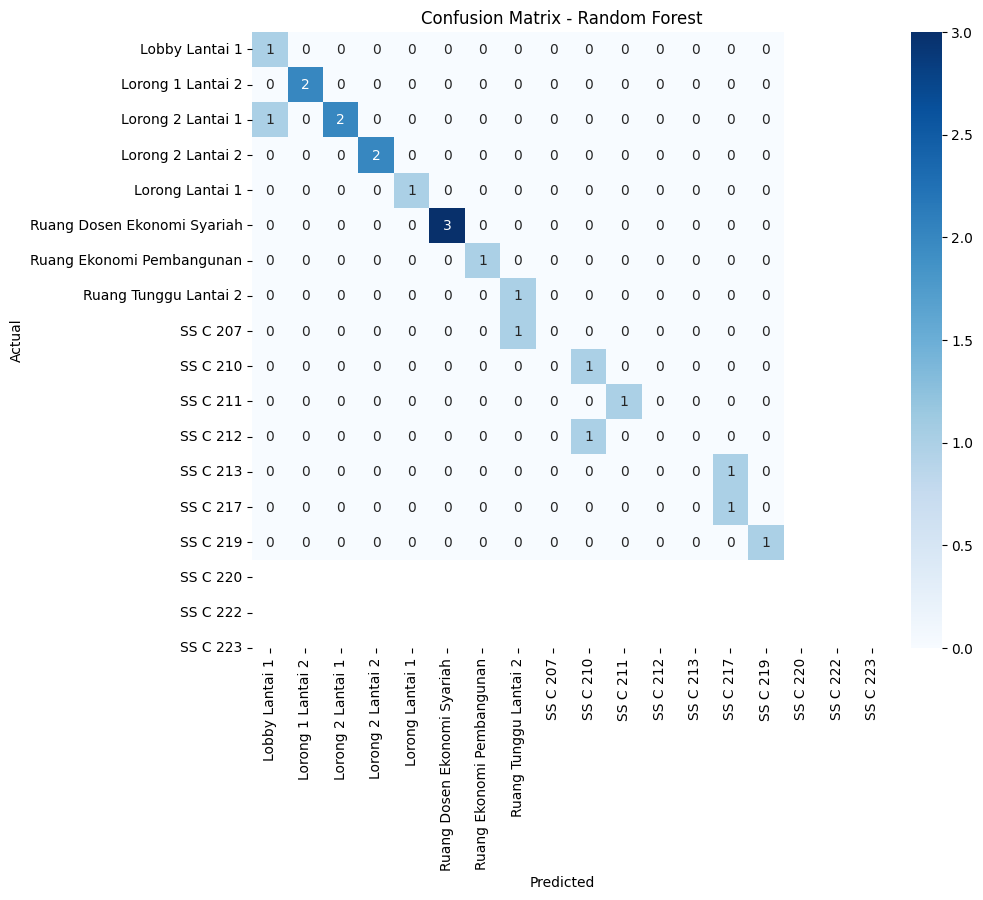

In [6]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [7]:
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [f"{accuracy:.1%}"],
    'Precision': [f"{precision:.1%}"],
    'Recall': [f"{recall:.1%}"],
    'F1-Score': [f"{f1:.1%}"]
})

print("📌 Rangkuman Performa Model:")
print(results)

📌 Rangkuman Performa Model:
           Model Accuracy Precision Recall F1-Score
0  Random Forest    81.0%     76.2%  81.0%    76.5%


c:\Users\wtrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("✅ Model Random Forest disimpan sebagai 'rf_model.pkl'")

✅ Model Random Forest disimpan sebagai 'rf_model.pkl'
